Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [69]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [70]:
Npx = 2 # Number of plaquette in each dimension
Npy = 1
model = site.SitesOBC(Npx, Npy)

In [71]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 10
array of ordered sites:  [0 1 2 3 4 5 6 7 8 9]
5
6
2
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B']


In [72]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]]


In [73]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [0 1 2 3 4 5 6 7 8 9]
(0, 1)


In [74]:
9 % 2

1

In [75]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()

In [76]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[0 1]
 [2 3]
 [6 7]
 [8 9]]
yy_bond:  [[2 1]
 [4 3]
 [6 5]
 [8 7]]
zz_bond:  [[0 5]
 [2 7]
 [4 9]]
diagonal_bonds:  [[0 7]
 [2 9]]


In [77]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


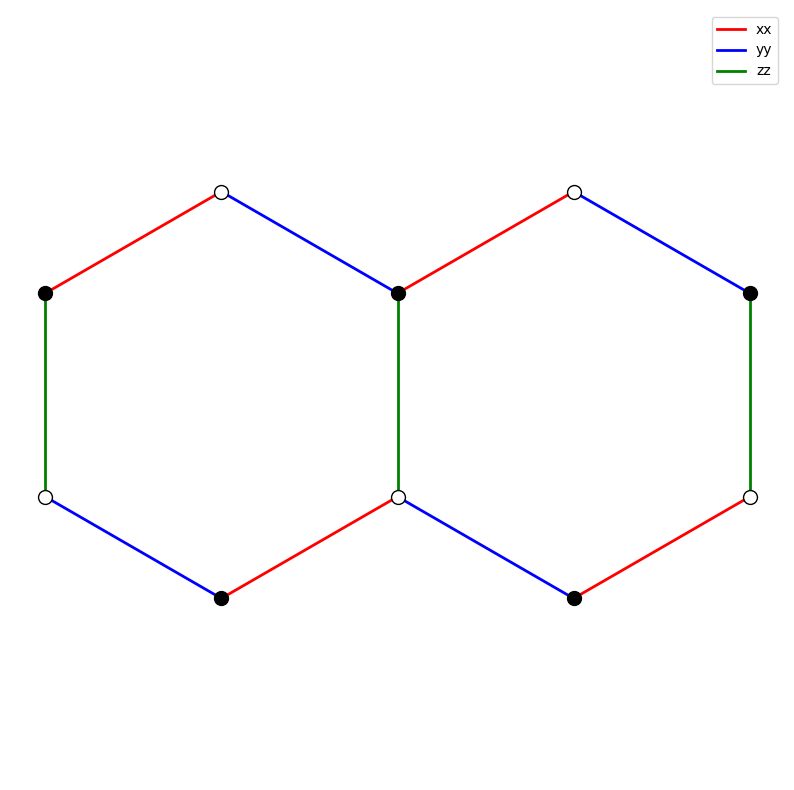

In [78]:
modell = site.SitesOBC(Npx = 2, Npy = 1)
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]
# honey.plot_honeycomb(modell, plot_anyon_bonds = True, plot_diagonal_bonds=False, sites = indices, plaquette_site = 40)
honey.plot_honeycomb(modell, plot_anyon_bonds = False, plot_diagonal_bonds=False, fig_size=(10,10))


In [529]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 0 idy 1
x 0.0 y -1.0
id 8 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 9 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 10 idx 3 idy 1
x 2.598076211353316 y -1.5
id 11 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 12 idx 5 idy 1
x 4.330127018922193 y -1.5
id 13 idx 6 idy 1
x 5.196152422706632 y -1.0
id 14 idx 7 idy 1
x 6.06217782649107 y -1.5
id 15 idx 0 idy 2
x 0.0 y -3.0
id 16 idx 1 idy 2
x 0.8660254037844386 y -2.5
id 17 idx 2 idy 2
x 1.7320508075688772 y -3.0
id 18 idx 3 idy 2
x 2.598076211353316 y -2.5
id 19 idx 4 idy 2
x 3.4641016151377544 y -3.0
id 20 idx 5 idy 2
x 4.330127018922193 y -2.5
id 21 idx 6 idy 2
x 5.196152422706632 y -3.0
id 22 idx 7 idy 2
x 6.06217782649107 y -2.5
id 23 idx 0 i

### Fermionic representation of many wonderful things

In [538]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [539]:
model = site.SitesOBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

70


In [540]:
h0_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)*(1/1j)
h0_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)*(1/1j)
h0_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)*(1/1j)

H0_x = fgs.Hamiltonian_dirac(h0_x)
H0_y = fgs.Hamiltonian_dirac(h0_y)
H0_z = fgs.Hamiltonian_dirac(h0_z)

dfx = pd.DataFrame(H0_x)
dfy = pd.DataFrame(H0_y)
dfz = pd.DataFrame(H0_z)

print("Hamiltonian H0_x:\n", dfx.round(2))
print("Hamiltonian H0_y:\n", dfy.round(2))
print("Hamiltonian H0_z:\n", dfz.round(2))

Adding xx bonds with Jxx = 1.0
Adding yy bonds with Jyy = 1.0
Adding zz bonds with Jzz = 1.0
Hamiltonian H0_x:
           0         1         2         3         4         5         6   \
0  -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1   0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2   0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3   0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j   
..       ...       ...       ...       ...       ...       ...       ...   
65  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
66  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
67  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
68  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
69  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j

In [541]:
he_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')*(1/1j)
he_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')*(1/1j)
he_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')*(1/1j)

He_x = fgs.Hamiltonian_dirac(he_x)
He_y = fgs.Hamiltonian_dirac(he_y)
He_z = fgs.Hamiltonian_dirac(he_z)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

Adding xx bonds with Jxx = 1.0
type = Anyon!
Adding yy bonds with Jyy = 1.0
type = Anyon!
Adding zz bonds with Jzz = 1.0
type = Anyon!


# Topological Order Parameter

In [542]:
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]

# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(-1+0j)


## Majorana notation
R = e^-(h/8)

In [560]:
from scipy.linalg import expm

T = 1.
t = T*np.pi/4.
Rex = expm(he_x*t*4)
Rey = expm(he_y*t*4)
Rez = expm(he_z*t*4)
fgs.update_cov_matrix(Rex)
fgs.update_cov_matrix(Rey)
fgs.update_cov_matrix(Rez)

N = 10
exp_value = []
for i in range(N):
    fgs.update_cov_matrix(Rex)
    fgs.update_cov_matrix(Rey)
    fgs.update_cov_matrix(Rez)
    n = fgs.expectation_val_Majorana_string(loop)
    exp_value.append(n)
    print(n)

(1-0j)
(-1+0j)
(1-0j)
(-1+0j)
(1-0j)
(-1+0j)
(1-0j)
(-1+0j)
(1-0j)
(-1+0j)


/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Measurement of Loop operator O under Floquet drive')

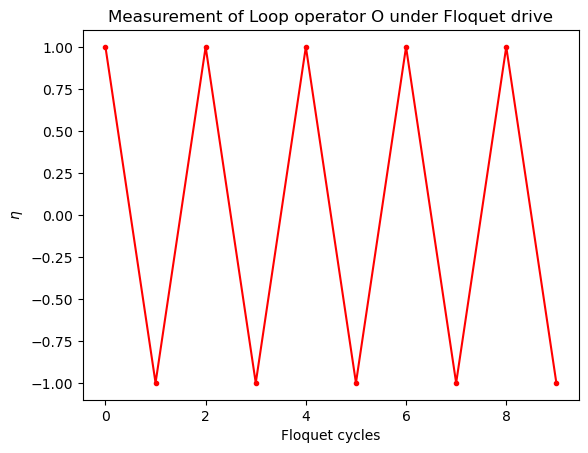

In [562]:
plt.plot(range(N), exp_value, '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")

In [549]:
R0x = expm(h0_x*t*4)
R0y = expm(h0_y*t*4)
R0z = expm(h0_z*t*4)
fgs.update_cov_matrix(R0x)
fgs.update_cov_matrix(R0y)
fgs.update_cov_matrix(R0z)

print(fgs.expectation_val_Majorana_string(loop))


(1-0j)


We define $\tilde{U}(T) = exp(2i \frac{T}{3}H_{0x})exp(2i \frac{T}{3}H_{0y})exp(2i \frac{T}{3}H_{0z})$

In [ ]:
from scipy.linalg import expm

T = 1.

Utilde = expm(2*1j*T*H0_x/3.)*expm(2*1j*T*H0_y/3.)*expm(2*1j*T*H0_z/3.)

In [ ]:
eigvals, eigvecs = np.linalg.eig(Utilde)

In [ ]:
print(eigvals)

[2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j
 2.67315964+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 2.67315964+0.j
 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j]
